# La bibliotheque quantique

## **Rappel :**
Bob à subit une malédiction et seul un livre peut nous donner son remede. dans la bibliotheque quantique 4 livres sont disponible de maniere aléatoire avec le remede et 3 autres das malédiction.
Le but ici est de trouver un moyen d'avoir le plus de chance d'obtenir le remede

## **Au préalable:**
Les 4 livres sont numeroter de 0 à 3 et donc sous la forme binaire de 00 à 11
ainsi les livres peuvent être représneter par 2 qbit , 1 pour le premier bit de la valeur du livre et le 2eme qbit pour la deuxieme valeur

#### Importation des librairies

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

#### Initialisation

##### Création du circuit


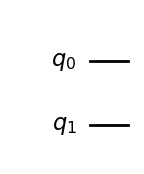

In [2]:
circ_enigme = QuantumCircuit(2) 
circ_enigme.draw(output="mpl", fold=-1)

##### QBit representant les états des livres

Application d'un porte haadamar sur chaque Qbit pour avoir un état aléatoire des livres

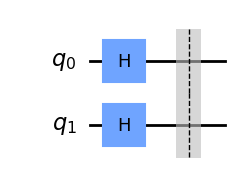

In [3]:
circ_enigme.h(0)
circ_enigme.h(1)
circ_enigme.barrier()
circ_enigme.draw(output="mpl", fold=-1)

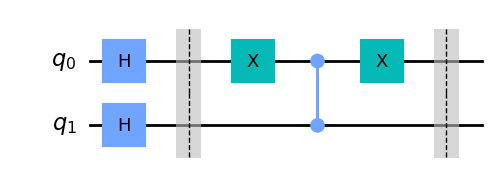

In [4]:
circ_enigme.x(0)
circ_enigme.cz(0,1)
circ_enigme.x(0)
circ_enigme.barrier()
circ_enigme.draw(output="mpl", fold=-1)

On utilise une porte Control Z pour inverser la phase quantique et deux porte x car nous avons choisi le livre 2 10 pour utiliser la porte de commande Z. Ensuite, on change le 0 en 1 pour utiliser la porte de controle Z puis remettre la valeur dans sa position initiale.


On utilise le diffuseur (algorythme de grover) pour créer des effets négatifs. Une fois que tout est annulé, on va laisser apparaître le problème.

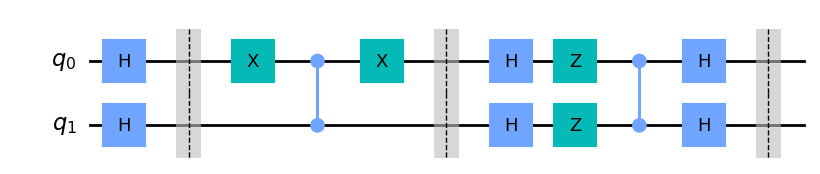

In [5]:
circ_enigme.h(0)
circ_enigme.h(1)
circ_enigme.z(0)
circ_enigme.z(1)
circ_enigme.cz(0,1)
circ_enigme.h(0)
circ_enigme.h(1)
circ_enigme.barrier()

circ_enigme.draw(output="mpl", fold=-1)

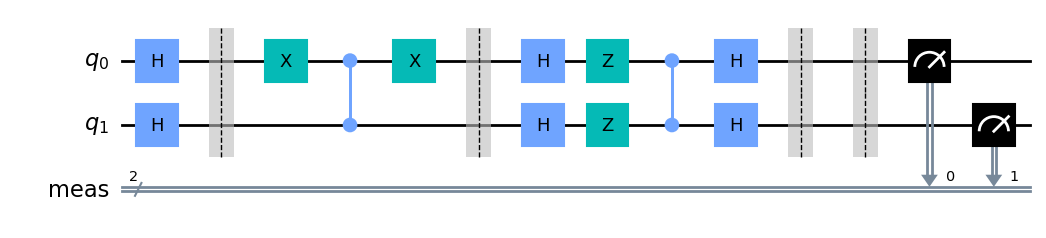

In [6]:
circ_enigme.measure_all() 
circ_enigme.draw(output="mpl", fold=-1)

on ajoute des prise de mesure sur chaque Qbit pour voir le resultat

#### Simulation

Statevector([0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
            dims=(2, 2))


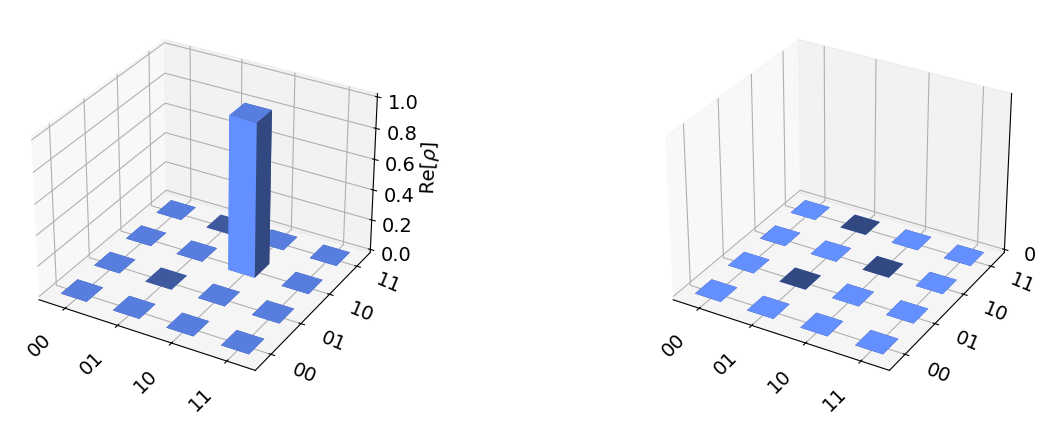

In [7]:
# Utilisation du backend 'statevector_simulator' de Qiskit pour simuler le circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ_enigme)
result = job.result()
outputstate = result.get_statevector(circ_enigme,decimals=3)
print(outputstate)
# Représentation graphique de l'état final
plot_state_city(outputstate)

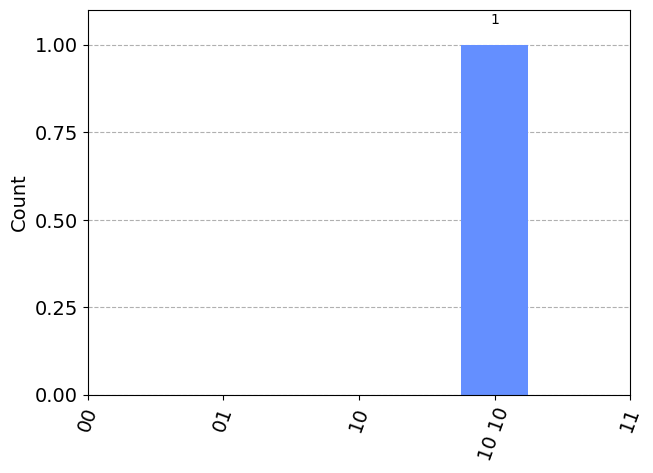

In [9]:
circ_enigme.measure_all()
nbr_mesure = 100_000

backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ_enigme)
result = backend.run(transpile(circ_enigme, backend), shots=nbr_mesure).result()
counts  = result.get_counts(circ_enigme)
all_possible_states = [format(i, '0' + str(circ_enigme.num_qubits) + 'b') for i in range(2**circ_enigme.num_qubits)]

probabilities = {state: 0 for state in all_possible_states}

# Mettez à jour les probabilités pour les états observés
for key in counts.keys():
    probabilities[key] = (counts[key])/nbr_mesure

plot_histogram(probabilities)

# **Interprétation des résultats**

On peut voir ici que l'on a 100% de chance de trouver le remède